In [1]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [2]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [3]:
import git
git = git.Git("../../../sonarqube/") 

### Import tags

In [4]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags.actual_release_date = pd.to_datetime(alltags.actual_release_date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
alltags.rename(columns={"Date":"release_date"}, inplace=True)
tags = alltags.tail(-1)
tags

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2
6,2016-01-28,5.3,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2016-01-08 10:09:15,1,2016,5,5.3
7,2016-04-01,5.4,7b02df9be3cd9448699b5857586e1c6e2b28c007,2016-03-08 15:48:19,3,2016,5,5.4
8,2016-05-19,5.5,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,2016-05-02 14:09:29,5,2016,5,5.5
9,2016-06-08,5.6,074f3d1169f9688d15af4aff67e7e672cbeed782,2016-06-01 11:59:09,6,2016,5,5.6
10,NaT,5.6.1,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,2016-07-25 08:13:12,7,2016,5,5.6.1


### Filter the ones after the project started using TravisCI

In [5]:
tags = tags[tags.release_date > "2015-03-10"]

In [6]:
tags.Tag.nunique()

56

### Import tag comparison pairs

In [7]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated_no_rc_and_milestones.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison.tail(20)

,from_author_date,to_author_date,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days,to_tag,from_tag
34,2018-02-02 12:20:31,2018-03-23 20:20:52,315,0,3b827a9a9a4b133c9fbe168aec8db44d78efeaeb,ecdde3879059a41f229782061bdad49677dd63f8,315,49 days 08:00:21,49.333576,2018-02-02 13:20:31,2018-03-23 20:20:52,49 days 07:00:21,49.291910,7.1,7.0
35,2018-03-23 20:20:52,2018-06-13 20:20:50,500,0,ecdde3879059a41f229782061bdad49677dd63f8,d7828ea4d821aaceedd431004c83a196cea8b38a,500,81 days 23:59:58,81.999977,2018-03-23 20:20:52,2018-06-13 20:20:50,81 days 23:59:58,81.999977,7.2,7.1
36,2018-06-13 20:20:50,2018-07-20 20:21:18,228,0,d7828ea4d821aaceedd431004c83a196cea8b38a,87c1e3d93bf8a583932c11d4e1b740e91f80ffa0,228,37 days 00:00:28,37.000324,2018-06-13 20:20:50,2018-07-20 20:21:18,37 days 00:00:28,37.000324,7.3,7.2
37,2018-07-20 20:21:18,2018-08-03 20:21:25,101,0,87c1e3d93bf8a583932c11d4e1b740e91f80ffa0,86937350807da2beb38dcd4216eafea0009fb99f,101,14 days 00:00:07,14.000081,2018-07-20 20:21:18,2018-08-03 20:21:25,14 days 00:00:07,14.000081,7.4,7.3
38,2018-08-03 20:21:25,2018-12-18 09:56:40,657,0,86937350807da2beb38dcd4216eafea0009fb99f,cb851ba202973bd468e070572c1e3b0b0437d2f4,657,136 days 13:35:15,136.566146,2018-08-03 20:21:25,2018-12-20 11:41:48,138 days 15:20:23,138.639155,7.5,7.4
39,2018-12-18 09:56:40,2019-01-21 15:04:13,243,0,cb851ba202973bd468e070572c1e3b0b0437d2f4,c2edd480f08c8a692757df5ce6c89cddb566b666,243,34 days 05:07:33,34.213576,2018-12-20 11:41:48,2019-01-21 20:21:01,32 days 08:39:13,32.360567,7.6,7.5
40,2019-01-21 15:04:13,2019-03-19 16:29:12,236,0,c2edd480f08c8a692757df5ce6c89cddb566b666,69bc562d207053ef21afd12c8bc9c5217b50227a,236,57 days 01:24:59,57.059016,2019-01-21 20:21:01,2019-03-20 16:29:54,57 days 20:08:53,57.839502,7.7,7.6
41,2019-03-19 16:29:12,2019-06-18 09:08:04,509,0,69bc562d207053ef21afd12c8bc9c5217b50227a,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,509,90 days 16:38:52,90.693657,2019-03-20 16:29:54,2019-06-18 20:21:07,90 days 03:51:13,90.160567,7.8,7.7
42,2019-06-18 09:08:04,2019-07-01 07:56:26,141,0,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,6502ec4ffee7e5a57498baaf330b80eb490d01c2,141,12 days 22:48:22,12.950255,2019-06-18 20:21:07,2019-10-17 15:24:45,120 days 19:03:38,120.794190,7.9,7.8
43,2019-07-01 07:56:26,2019-07-10 12:20:33,17,0,6502ec4ffee7e5a57498baaf330b80eb490d01c2,6818fad17ba67e97d395a8488d5412e00892d5e1,17,9 days 04:24:07,9.183414,2019-10-17 15:24:45,2019-10-17 15:24:48,0 days 00:00:03,0.000035,7.9.1,7.9


### Import issues

In [8]:
issues = pd.read_csv(f"{csv_folder}/issues_community.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.resolutiondate = issues.resolutiondate.dt.tz_localize(None)
issues = issues[~(issues.edition == "Enterprise")]
issues

,updated,environment,creator,issue_id,reporter,issuetype_name,issue_key,assignee,votes,created,project,resolutiondate,status_id,summary,reporter_name,resolution_name,lastViewed,issuetype_id,edition,duedate,status_name,votes_votes,description,priority_id,priority_name,status,assignee_name,creator_name,created_month,created_year
0,2020-09-29 08:54:53+00:00,NaN,Julien Lancelot,97898,Julien Lancelot,Task,SONAR-13913,NaN,0,2020-09-29 08:54:53+00:00,SONAR,NaT,1,Remove table clean up used in Integration Tests,julien.lancelot,NaN,NaT,3,Community,NaT,Open,0,- Remove org.sonar.server.platform.BackendClea...,3,Major,Open,NaN,julien.lancelot,9,2020
1,2020-09-28 10:18:24+00:00,NaN,Malena Ebert,97868,Malena Ebert,Task,SONAR-13912,Malena Ebert,0,2020-09-28 10:14:16+00:00,SONAR,NaT,1,Add OWASP Dependency Check task to Cirrus CI,malena.ebert,NaN,NaT,3,Community,NaT,Open,0,The goal of this task is to detect vulnerabili...,3,Major,Open,malena.ebert,malena.ebert,9,2020
3,2020-09-28 15:38:40+00:00,NaN,Jeremy Davis,97858,Jeremy Davis,New Feature,SONAR-13909,Julien Lancelot,0,2020-09-28 09:20:49+00:00,SONAR,NaT,10002,C# and VB.NET analysis updates,jeremy.davis,NaN,NaT,2,Community,2020-10-05 00:00:00+00:00,In Review,0,The C# analysis now improves complexity rules ...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
4,2020-09-28 20:02:41+00:00,NaN,Jeremy Davis,97855,Jeremy Davis,Improvement,SONAR-13907,Julien Lancelot,0,2020-09-28 09:00:01+00:00,SONAR,NaT,10002,JavaScript/TypeScript analysis updates,jeremy.davis,NaN,NaT,4,Community,2020-10-05 00:00:00+00:00,In Review,0,The changes are:\r\n* a new rule to detect XXE...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
5,2020-09-24 12:57:08+00:00,NaN,Mathieu Cutivel,97813,Mathieu Cutivel,Improvement,SONAR-13906,Mathieu Cutivel,0,2020-09-24 12:57:00+00:00,SONAR,NaT,3,Prevent ALM binding configuration modal from c...,mathieu.cutivel,NaN,NaT,4,Community,2020-10-01 00:00:00+00:00,In Progress,0,When clicking outside of the ALM configuration...,3,Major,In Progress,mathieu.cutivel,mathieu.cutivel,9,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,2018-11-19 20:05:50+00:00,NaN,Julien Lancelot,29597,Julien Lancelot,Sub-task,SONAR-6320,Julien Lancelot,0,2015-03-18 03:35:05+00:00,SONAR,2015-03-25 02:35:05,6,Symbol in compute,julien.lancelot,Fixed,NaT,5,NaN,2015-04-09 00:00:00+00:00,Closed,0,NaN,3,Major,Closed,julien.lancelot,julien.lancelot,3,2015
5783,2015-06-15 06:18:13+00:00,NaN,Julien Lancelot,29605,Julien Lancelot,Sub-task,SONAR-6319,Julien Lancelot,0,2015-03-18 03:34:46+00:00,SONAR,2015-03-31 12:43:41,6,Feed highlighting in compute report,julien.lancelot,Fixed,NaT,5,NaN,2015-04-09 00:00:00+00:00,Closed,0,NaN,3,Major,Closed,julien.lancelot,julien.lancelot,3,2015
5784,2015-10-28 09:15:38+00:00,NaN,Julien Lancelot,28763,Julien Lancelot,Sub-task,SONAR-6318,Julien Lancelot,0,2015-03-18 03:34:24+00:00,SONAR,2015-10-21 14:53:31,6,Highlighting in compute,julien.lancelot,Fixed,NaT,5,NaN,2015-04-15 00:00:00+00:00,Closed,0,NaN,3,Major,Closed,julien.lancelot,julien.lancelot,3,2015
5785,2015-06-15 06:18:13+00:00,NaN,Julien Lancelot,29607,Julien Lancelot,Sub-task,SONAR-6317,OLD - Teryk Bellahsene,0,2015-03-18 03:31:30+00:00,SONAR,2015-03-26 09:40:48,6,Feed SCM in compute report,julien.lancelot,Fixed,NaT,5,NaN,2015-04-02 00:00:00+00:00,Closed,0,NaN,3,Major,Closed,bteryk,julien.lancelot,3,2015


In [9]:
issues.shape

(4478, 30)

### Import issue versions

In [10]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### How many issues before and after the release?

In [11]:
focus_columns = ["issue_id","version_name","Tag","version_id","issue_key","issuetype_name","created", "actual_release_date", "release_date"]

In [12]:
v_merged = versions.merge(issues, on="issue_id")

In [13]:
v_merged.version_name.unique()

array(['8.4', '8.4.1', '7.9', '8.3', '8.3.1', '7.7', '8.2', '7.8', '8.0',
       '8.1', '7.9.1', '6.7.7', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '3.5',
       '6.7', '6.7.6', '6.7.5', '6.7.1', '6.7.4', '7.2.1', '5.6.7',
       '6.7.3', '6.7.2', '5.6', '6.6-M1', '6.3.1', '5.6.6', '6.5-M1',
       '6.3.2', '5.6.3', '5.6.5', '5.6.4', '5.5', '5.2', '5.6.1', '5.6.2',
       '6.1.1', '4.5.7', '5.4', '5.3', '4.5.6', '4.5.1', '4.5', '4.4',
       '5.0', '5.1.2', '5.1', '5.1.1', '4.5.5', '4.5.2', '4.5.4'],
      dtype=object)

In [14]:
vm_merged = v_merged.merge(tags, left_on="version_name", right_on="jira_version")

In [15]:
vm_merged.created = vm_merged.created.dt.tz_localize(None)
vm_merged

,issue_id,version_name,version_id,updated,environment,creator,reporter,issuetype_name,issue_key,assignee,votes,created,project,resolutiondate,status_id,summary,reporter_name,resolution_name,lastViewed,issuetype_id,edition,duedate,status_name,votes_votes,description,priority_id,priority_name,status,assignee_name,creator_name,created_month,created_year,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
0,97521,8.4,15833,2020-09-16 07:58:23+00:00,NaN,Jeremy Davis,Jeremy Davis,Bug,SONAR-13874,NaN,0,2020-09-16 07:51:26,SONAR,NaT,1,"The new code period isn't shown for ""reference...",jeremy.davis,NaN,NaT,1,Community,NaT,Open,0,"When the new code setting is defined as ""refer...",3,Major,Open,NaN,jeremy.davis,9,2020,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
1,96398,8.4,15833,2020-07-31 14:16:21+00:00,NaN,Duarte Meneses,Duarte Meneses,Bug,SONAR-13699,Duarte Meneses,0,2020-07-29 14:59:04,SONAR,2020-07-31 10:44:35,6,Purge profiling is missing,duarte.meneses,Fixed,NaT,1,Community,2020-08-05 00:00:00+00:00,Closed,0,The ability to profile the DB purge was remove...,3,Major,Closed,duarte.meneses,duarte.meneses,7,2020,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
2,95887,8.4,15833,2020-07-15 14:13:05+00:00,NaN,Duarte Meneses,Duarte Meneses,Bug,SONAR-13613,Duarte Meneses,0,2020-07-09 13:07:21,SONAR,2020-07-10 15:31:03,6,DB migrations on upgrade fail due to orphan fo...,duarte.meneses,Fixed,NaT,1,Community,2020-07-16 00:00:00+00:00,Closed,0,In the upgrade to v8.4 there are many migratio...,1,Blocker,Closed,duarte.meneses,duarte.meneses,7,2020,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
3,95800,8.4,15833,2020-07-15 14:13:08+00:00,NaN,Duarte Meneses,Duarte Meneses,Bug,SONAR-13594,Duarte Meneses,0,2020-07-07 13:05:22,SONAR,2020-07-10 18:38:03,6,Upgrade to 8.4 fails on MS SQL Server,duarte.meneses,Fixed,NaT,1,Community,2020-07-16 00:00:00+00:00,Closed,0,A step in the migrations fails for some instan...,1,Blocker,Closed,duarte.meneses,duarte.meneses,7,2020,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
4,95773,8.4,15833,2020-07-22 13:16:26+00:00,NaN,Pierre Guillot,Pierre Guillot,Bug,SONAR-13590,Pierre Guillot,1,2020-07-06 11:11:13,SONAR,2020-07-08 14:50:23,6,SonarQube is not starting when in need of issu...,pierre.guillot,Fixed,NaT,1,Community,2020-07-14 00:00:00+00:00,Closed,1,This issue was raised by the [community|https:...,1,Blocker,Closed,pierre.guillot,pierre.guillot,7,2020,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,40460,5.1.1,11628,2018-11-08 21:00:18+00:00,NaN,Simon Brandhof,Simon Brandhof,Bug,SONAR-6718,Simon Brandhof,0,2015-07-15 10:11:04,SONAR,2015-07-15 10:34:41,6,Issue tracking is not accurate when an action ...,simon.brandhof,Fixed,NaT,1,NaN,2015-07-22 00:00:00+00:00,Closed,0,"The field ""checksum"" is unset when an action i...",3,Major,Closed,simon.brandhof,simon.brandhof,7,2015,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
744,40452,5.1.1,11628,2015-07-22 17:06:42+00:00,NaN,Simon Brandhof,Simon Brandhof,Bug,SONAR-6715,Simon Brandhof,0,2015-07-15 06:29:57,SONAR,2015-07-22 07:54:57,6,"Preview analysis fails with ""UnsupportedOperat...",simon.brandhof,Fixed,NaT,1,NaN,2015-07-29 00:00:00+00:00,Closed,0,RuleFinder#find(RuleQuery) fails in preview mo...,3,Major,Closed,simon.brandhof,simon.brandhof,7,2015,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
745,40418,5.1.1,11628,2016-11-29 16:30:21+00:00,NaN,Jean-Denis Coffre,Jean-Denis Coffre,Bug,SONAR-6708,Stas Vilchik,0,2015-07-10 11:09:15,SONAR,2015-09-16 06:37:1

**How many issues opened after release date?**

In [16]:
(vm_merged.created > vm_merged.release_date).value_counts(normalize=True)

True     0.836898
False    0.163102
dtype: float64

<AxesSubplot:ylabel='count'>

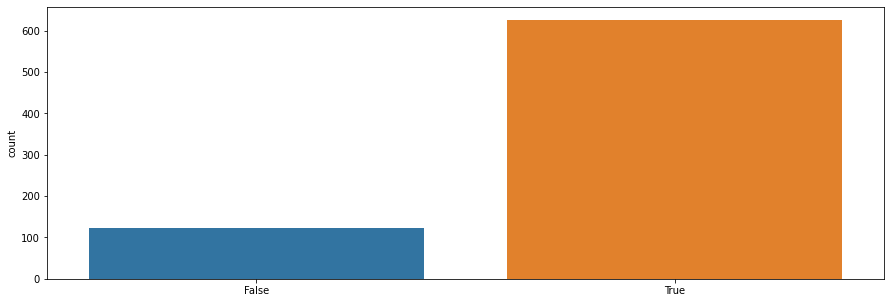

In [17]:
sns.countplot(x=vm_merged.created > vm_merged.release_date)

**Post release issues**

In [18]:
post_release = vm_merged[vm_merged.created > vm_merged.release_date]

In [19]:
post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-19-527cbe80a733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
<ipython-input-19-527cbe80a733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")


<AxesSubplot:xlabel='diff_release_created_days'>

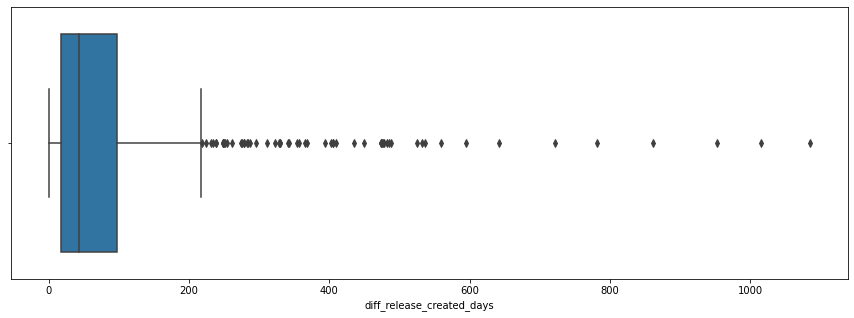

In [20]:
sns.boxplot(x=post_release.diff_release_created_days)

In [21]:
post_release.issuetype_name.value_counts(normalize=True)

Bug              0.896166
Improvement      0.089457
Task             0.007987
Documentation    0.006390
Name: issuetype_name, dtype: float64

**Investigate outliers**

In [22]:
post_release[post_release.diff_release_created_days > 600][focus_columns]

,issue_id,version_name,Tag,version_id,issue_key,issuetype_name,created,actual_release_date,release_date
130,86937,6.0,6.0,13026,SONAR-12341,Bug,2019-07-24 09:50:48,2016-08-16,2016-08-03 09:19:42
159,86937,6.1,6.1,13287,SONAR-12341,Bug,2019-07-24 09:50:48,2016-10-25,2016-10-11 07:02:29
173,86937,6.2,6.2,13327,SONAR-12341,Bug,2019-07-24 09:50:48,2017-01-05,2016-12-13 15:05:23
203,86937,6.3,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-04-12,2017-03-14 09:12:39
225,86937,6.4,6.4,13697,SONAR-12341,Bug,2019-07-24 09:50:48,2017-06-29,2017-06-02 08:32:25
255,86937,6.5,6.5,13805,SONAR-12341,Bug,2019-07-24 09:50:48,2017-08-10,2017-08-01 11:58:54
276,86937,6.6,6.6,13961,SONAR-12341,Bug,2019-07-24 09:50:48,2017-10-20,2017-10-20 12:09:25


**Pre release issues**

In [23]:
pre_release = vm_merged[vm_merged.created < vm_merged.release_date]

In [24]:
pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-24-96d2cd9173a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
<ipython-input-24-96d2cd9173a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")


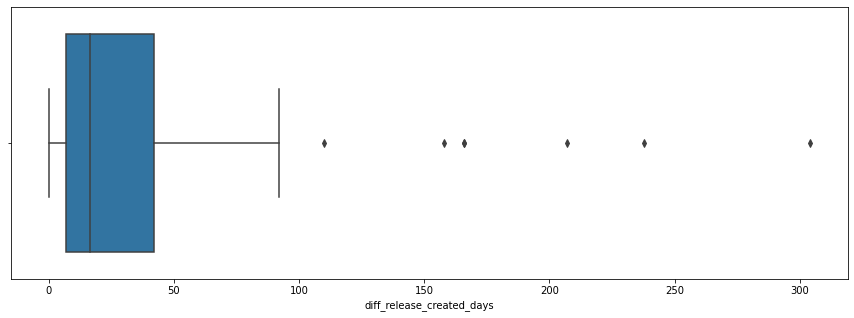

In [25]:
plt.figure()
sns_plot = sns.boxplot(x=pre_release.diff_release_created_days)
plt.savefig("output.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [26]:
pre_release[pre_release.diff_release_created_days>200][focus_columns]

,issue_id,version_name,Tag,version_id,issue_key,issuetype_name,created,actual_release_date,release_date
8,90155,8.4,8.4.0.35506,15833,SONAR-12692,Bug,2019-11-08 08:39:33,2020-07-07,2020-07-03 07:09:27
496,61798,6.7.3,6.7.3,14264,SONAR-9384,Bug,2017-06-06 14:45:35,NaT,2018-04-06 14:12:21
639,29791,5.2,5.2,11629,SONAR-6407,Improvement,2015-04-09 08:50:02,2015-11-26,2015-11-02 08:56:19


In [27]:
pre_release.issuetype_name.value_counts(normalize=True)

Bug              0.696721
Improvement      0.229508
Task             0.040984
Sub-task         0.024590
Documentation    0.008197
Name: issuetype_name, dtype: float64

### Software quality metrics merging

In [29]:
pre_bug_per_version = pre_release[pre_release.issuetype_name=="Bug"].groupby("version_name").issue_id.count().reset_index()

In [30]:
post_bug_per_version = post_release.groupby("version_name").issue_id.count().reset_index()

In [33]:
sw_quality_metrics = post_bug_per_version.merge(pre_bug_per_version, how="outer", on="version_name")
sw_quality_metrics.rename(columns={"issue_id_x":"post_release_bugs",
                                     "issue_id_y":"pre_release_bugs"}, inplace=True)
sw_quality_metrics = sw_quality_metrics.fillna(0)
sw_quality_metrics["dde"] = sw_quality_metrics.pre_release_bugs / (sw_quality_metrics.post_release_bugs + sw_quality_metrics.pre_release_bugs)
sw_quality_metrics

,version_name,post_release_bugs,pre_release_bugs,dde
0,4.5.7,1,0.0,0.000000
1,5.1,24,2.0,0.076923
2,5.1.1,6,0.0,0.000000
3,5.1.2,3,0.0,0.000000
4,5.2,48,2.0,0.040000
5,5.3,20,3.0,0.130435
6,5.4,19,11.0,0.366667
7,5.5,9,2.0,0.181818
8,5.6,37,1.0,0.026316
9,5.6.1,9,0.0,0.000000


### Priority of issues

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='priority_name', ylabel='count'>

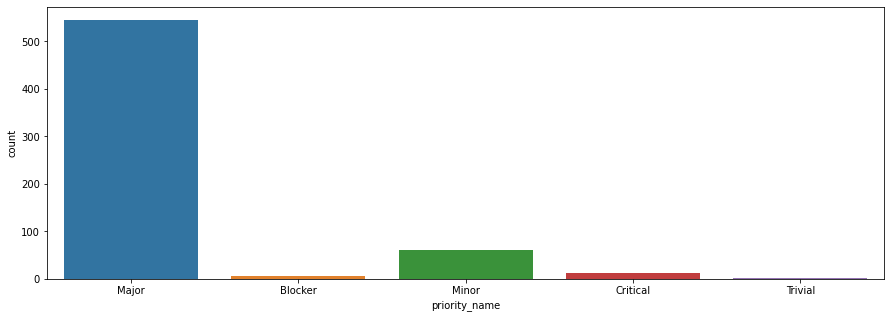

In [34]:
sns.countplot(post_release.priority_name)

In [35]:
critical_pr_per_version = post_release[post_release.priority_name.isin(["Critical", "Blocker"])].groupby("version_name").issue_id.count().reset_index()
critical_pr_per_version.rename(columns={"issue_id":"critical_post_release_bugs"}, inplace=True)
minor_pr_per_version = post_release[post_release.priority_name.isin(["Minor", "Trivial"])].groupby("version_name").issue_id.count().reset_index()
minor_pr_per_version.rename(columns={"issue_id":"minor_post_release_bugs"}, inplace=True)

In [36]:
sw_quality_metrics = sw_quality_metrics.merge(critical_pr_per_version, how="outer", on="version_name")
sw_quality_metrics.critical_post_release_bugs = sw_quality_metrics.critical_post_release_bugs.fillna(0)

In [37]:
sw_quality_metrics = sw_quality_metrics.merge(minor_pr_per_version, how="outer", on="version_name")
sw_quality_metrics.minor_post_release_bugs = sw_quality_metrics.minor_post_release_bugs.fillna(0)

In [38]:
sw_quality_metrics.head()

,version_name,post_release_bugs,pre_release_bugs,dde,critical_post_release_bugs,minor_post_release_bugs
0,4.5.7,1,0.0,0.000000,0.0,0.0
1,5.1,24,2.0,0.076923,0.0,2.0
2,5.1.1,6,0.0,0.000000,0.0,0.0
3,5.1.2,3,0.0,0.000000,0.0,0.0
4,5.2,48,2.0,0.040000,0.0,5.0


### Mean time to fix

In [39]:
post_release["fix_time"] = ((post_release.created - post_release.resolutiondate) / np.timedelta64(1, "D"))

<ipython-input-39-85f6aa898f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["fix_time"] = ((post_release.created - post_release.resolutiondate) / np.timedelta64(1, "D"))


In [40]:
fix_time_per_version = post_release.groupby("version_name").fix_time.mean().reset_index()

In [41]:
sw_quality_metrics = sw_quality_metrics.merge(fix_time_per_version, how="outer", on="version_name")
sw_quality_metrics

,version_name,post_release_bugs,pre_release_bugs,dde,critical_post_release_bugs,minor_post_release_bugs,fix_time
0,4.5.7,1,0.0,0.000000,0.0,0.0,-434.286030
1,5.1,24,2.0,0.076923,0.0,2.0,-60.531690
2,5.1.1,6,0.0,0.000000,0.0,0.0,-18.665239
3,5.1.2,3,0.0,0.000000,0.0,0.0,-103.197836
4,5.2,48,2.0,0.040000,0.0,5.0,-110.245705
5,5.3,20,3.0,0.130435,1.0,2.0,-139.124382
6,5.4,19,11.0,0.366667,1.0,0.0,-100.247500
7,5.5,9,2.0,0.181818,0.0,1.0,-11.802482
8,5.6,37,1.0,0.026316,0.0,2.0,-58.067984
9,5.6.1,9,0.0,0.000000,0.0,1.0,-92.887575


<AxesSubplot:>

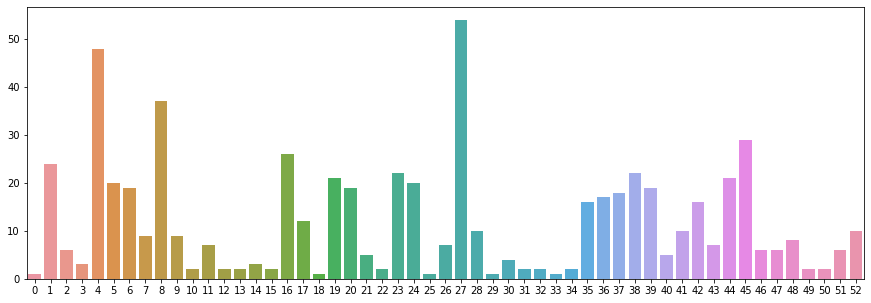

In [42]:
sns.barplot(x=sw_quality_metrics.post_release_bugs.index,\
           y=sw_quality_metrics.post_release_bugs.values)

<AxesSubplot:>

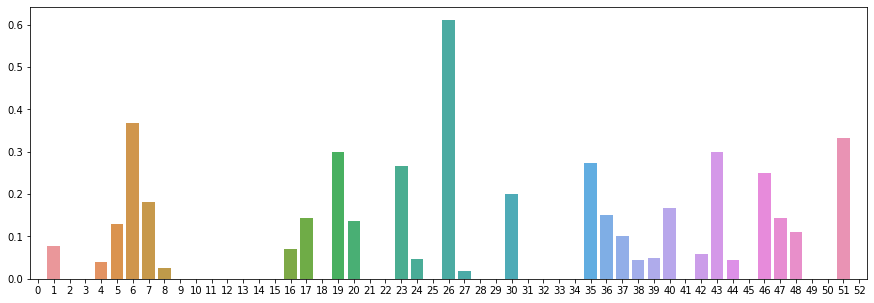

In [43]:
sns.barplot(x=sw_quality_metrics.dde.index,\
           y=sw_quality_metrics.dde.values)

<AxesSubplot:>

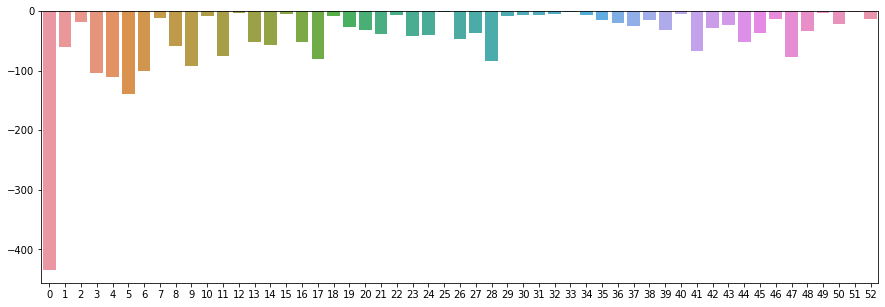

In [44]:
sns.barplot(x=sw_quality_metrics.fix_time.index,\
           y=sw_quality_metrics.fix_time.values)

### Export to csv

In [340]:
sw_quality_metrics.to_csv(f"{csv_folder}/tags_software_quality_metrics_no_rc_and_milestones.csv")